In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_style()
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## $$ f(x) = X^2 + x + 1 $$

In [21]:
def f(x):
    return x**2 + x + 1

def df(x):
    return 2*x+1

## Gradient Decendent

In [22]:
x = np.linspace(3,-3,500)

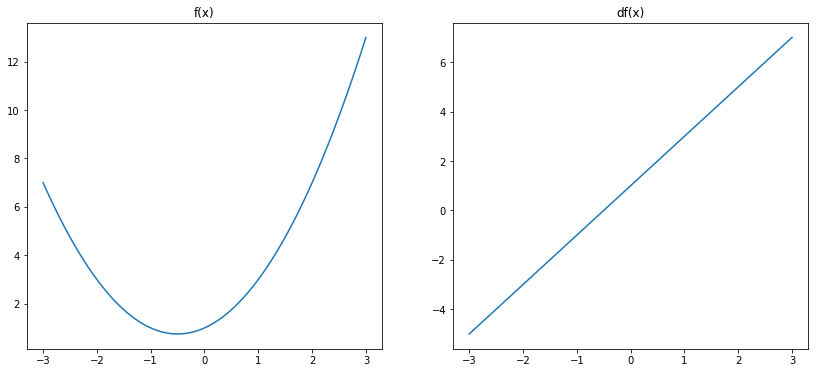

In [23]:
plt.figaspect(0.5)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

ax1.plot(x,f(x))
ax1.set_title('f(x)')
ax2.plot(x,df(x))
ax2.set_title('df(x)')
plt.show()

In [24]:
# finding minimumm and cost function

In [25]:
new_x = 3
prev_x = 0
learning_rate = 0.1
x_list=[]
slop_x = []
precision = 0.001

for i in range(300):
    
    prev_x = new_x
    
    new_x = prev_x - (learning_rate * df(prev_x))
    
    x_list.append(new_x)
    slop_x.append(df(new_x))
    step_size = abs(new_x-prev_x)
    #print(step_size)
    if step_size < precision:
        print(i)
        break
    
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))
    

30
Local minimum occurs at: -0.4965337678900009
Slope or df(x) value at this point is: 0.006932464219998158
f(x) value or cost at this point is: 0.7500120147650404


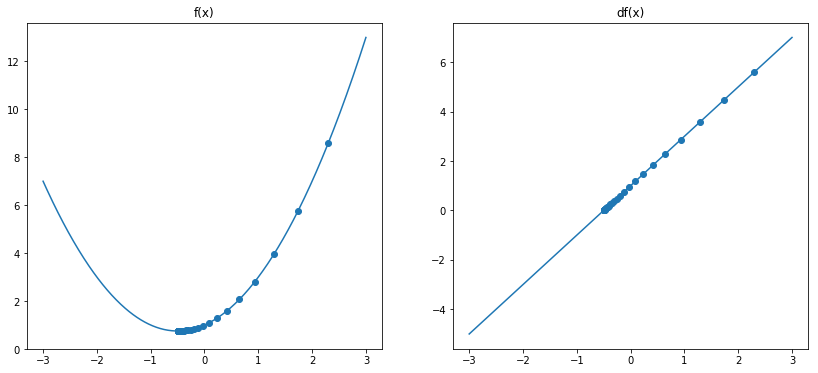

In [26]:
plt.figaspect(0.5)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

values = np.array(x_list)

ax1.plot(x,f(x))
ax1.scatter(values,f(values))
ax1.set_title('f(x)')
ax2.plot(x,df(x))

ax2.scatter(values,df(values))
ax2.set_title('df(x)')

plt.show()

In [27]:
x = np.linspace(-2,2,1000)

In [28]:
def grd(gradient,start_val,n_iter=300,lr=0.1,precision=0.001):
    
    x_list=[]
    slop_list=[]
    previous_val=0
    
    for i in range(n_iter):
        
        previous_val = start_val
        
        start_val = previous_val - (lr * gradient(previous_val))
        
        
        
        x_list.append(start_val)
        slop_list.append(df(start_val))
        step_size = abs(start_val-previous_val)
        x_min = start_val
   
        if step_size < precision:
            
            
            break
            
    return x_list,slop_list,x_min,i
      


In [29]:

dfg = grd(gradient = df,start_val=3,n_iter=300,lr=0.1,precision=0.001)

print('Local minimum occurs at:', dfg[2])
print('Slope or df(x) value at this point is:', df(dfg[2]))
print('f(x) value or cost at this point is:', f(dfg[2]))


Local minimum occurs at: -0.4965337678900009
Slope or df(x) value at this point is: 0.006932464219998158
f(x) value or cost at this point is: 0.7500120147650404


In [30]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

Local minimum occurs at: -1.409282626781808
Slope or df(x) value at this point is: -1.8185652535636159
f(x) value or cost at this point is: 1.5767948953672246


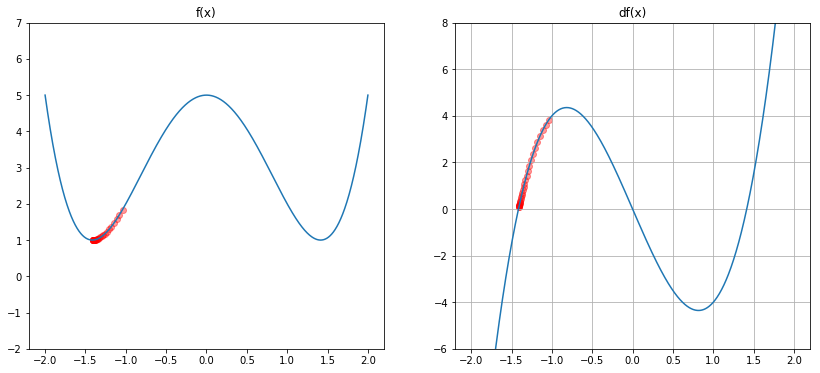

In [31]:
dfg = grd(gradient = dg,start_val=-1.0,n_iter=300,lr=0.01,precision=0.001)



print('Local minimum occurs at:', dfg[2])
print('Slope or df(x) value at this point is:', df(dfg[2]))
print('f(x) value or cost at this point is:', f(dfg[2]))



plt.figaspect(0.5)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

values = np.array(dfg[0])

ax1.plot(x,g(x))
ax1.scatter(values,g(values),alpha=0.4,color='red')
ax1.set_title('f(x)')
ax1.set_ylim(-2,7)
ax2.plot(x,dg(x))

ax2.scatter(values,dg(values),alpha=0.4,color='red')
ax2.set_ylim(-6,8)
ax2.set_title('df(x)')
ax2.grid()



plt.show()

# Learning Rate

In [32]:
values.shape

(29,)

No of steps: 72
Local minimum occurs at: 1.415341131151751
Slope or df(x) value at this point is: 3.830682262303502
f(x) value or cost at this point is: 4.418531648681669


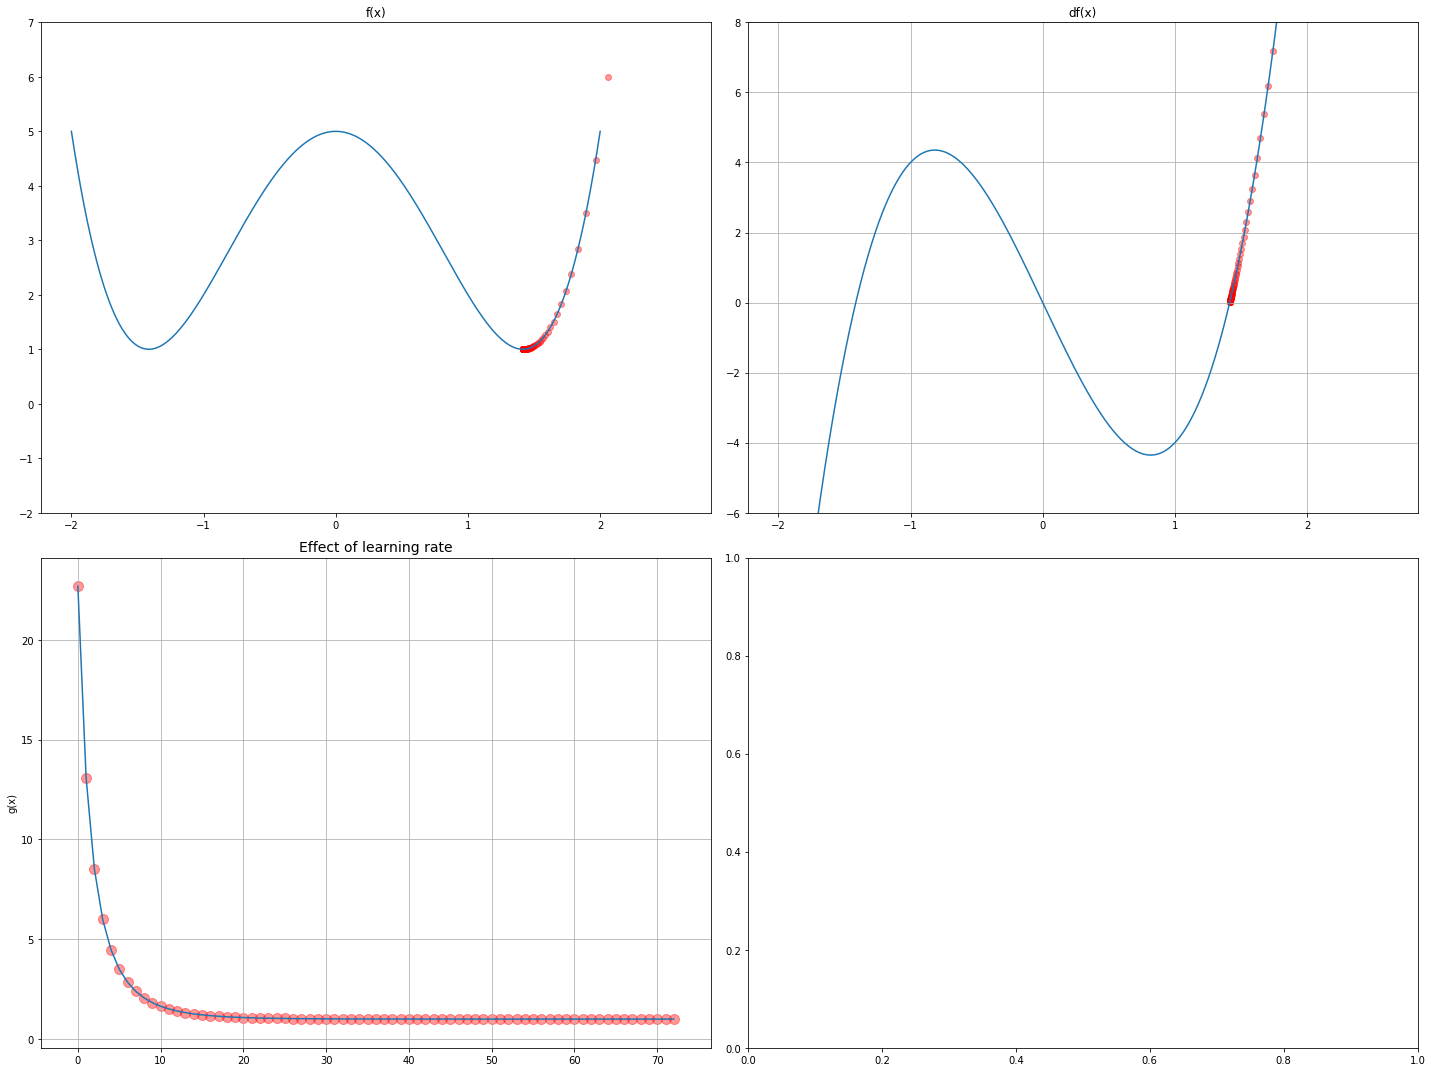

In [33]:
n= 500
dfg = grd(gradient = dg,start_val=3,n_iter=n,lr=0.005,precision=0.0001)

n_iterations = np.arange(0,dfg[3]+1)

print('No of steps:', dfg[3])
print('Local minimum occurs at:', dfg[2])
print('Slope or df(x) value at this point is:', df(dfg[2]))
print('f(x) value or cost at this point is:', f(dfg[2]))



plt.figaspect(0.5)
fig,ax = plt.subplots(2,2,figsize=(20,15))

values = np.array(dfg[0])

ax[0,0].plot(x,g(x))
ax[0,0].scatter(values,g(values),alpha=0.4,color='red')
ax[0,0].set_title('f(x)')
ax[0,0].set_ylim(-2,7)

ax[0,1].plot(x,dg(x))
ax[0,1].scatter(values,dg(values),alpha=0.4,color='red')
ax[0,1].set_ylim(-6,8)
ax[0,1].set_title('df(x)')
ax[0,1].grid()

ax[1,0].plot(n_iterations,g(values))
ax[1,0].scatter(n_iterations,g(values),alpha=0.4,color='red',s=100)
#ax[1,0].set_ylim(-6,8)
ax[1,0].set_ylabel('g(x)')
ax[1,0].set_title('Effect of learning rate',fontsize=14)
ax[1,0].grid()

plt.tight_layout()

plt.show()

# Exmaple 4 - Data viz with 3D charts

## minimise $$ f(x,y) = \frac {1}{3^{-x^2-y^2}+1}$$

In [34]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [35]:
x_4 = np.linspace(-2,2,200)#.reshape(-1,1)
y_4 = np.linspace(-2,2,200)#.reshape(-1,1)

print('shape of x array',x_4.shape)
print('shape of y array',y_4.shape)


x_4,y_4 = np.meshgrid(x_4,y_4)

shape of x array (200,)
shape of y array (200,)


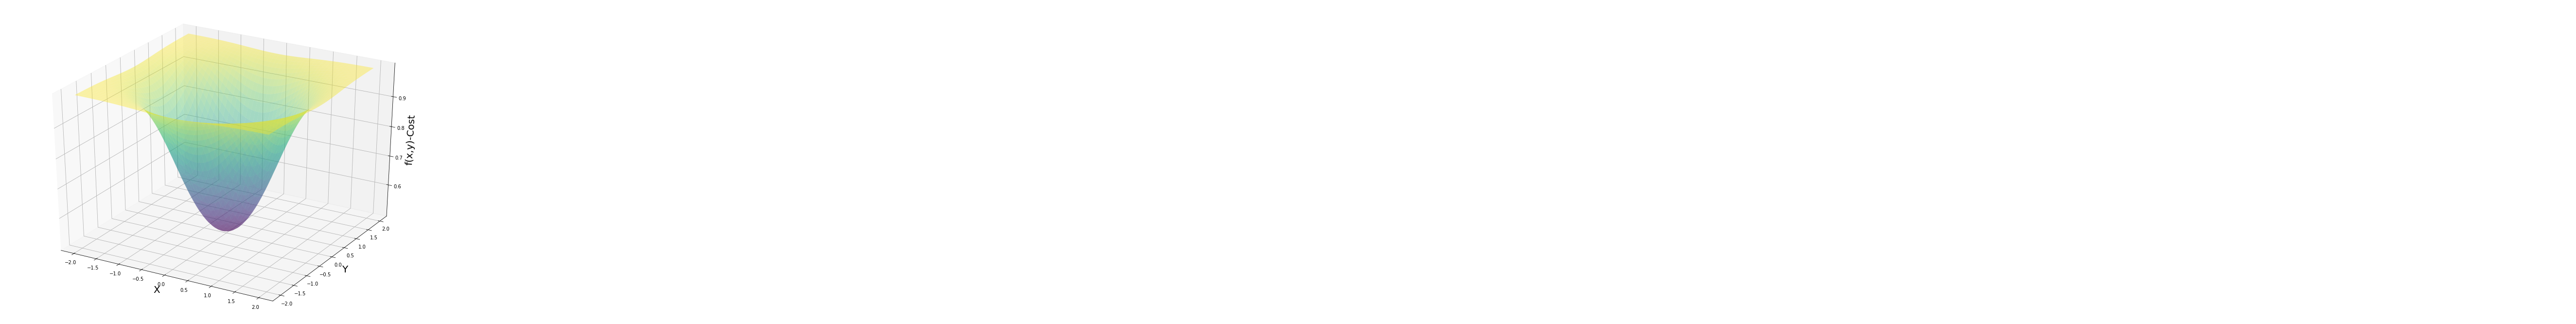

In [36]:
# Generating 3d plot

fig = plt.figure(figsize=(16,12))

ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-Cost',fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.viridis,alpha=0.4)


## Partial dervatives & Symbolic computation

In [37]:
from sympy import symbol, diff
from math import log

In [38]:
a,b = symbols('x,y')
print('Our cost function f(x,y)',f(a,b))
print('\n')
print ('Partial dervatives wrt to a is:',diff(f(a,b),a))
print ('Partial dervatives wrt to b is:',diff(f(a,b),b))

Our cost function f(x,y) 1/(3**(-x**2 - y**2) + 1)


Partial dervatives wrt to a is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial dervatives wrt to b is: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


In [39]:
print ('Value of f(x,y) at x=1.8,y=1.0: ',
       f(a,b).evalf(subs={a:1.8,b:1.0}))
#f(a,b).evalf(subs={a:1.8,b:1.0})

Value of f(x,y) at x=1.8,y=1.0:  0.990604794032582


In [40]:
diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})

0.0368089716197505

## Batch Gradient Descents with Sympy

## $$ \frac { \partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{(-x^2-y^2)}}{(3^{(-x^2 -y^2)}+1)^2}$$

## $$ \frac { \partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{(-x^2-y^2)}}{(3^{(-x^2 -y^2)}+1)^2}$$

In [41]:
def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return (2*x*log(3)*r) /(r+1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return (2*y*log(3)*r) /(r+1)**2

#2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [42]:
# Setup

lr = 0.1
max_iter = 300
params = np.array([1.8,1.0]) # intial guess

#gradient_x = diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})

for n in range(max_iter):
    
    # partial diff wrt to x
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    
    # partial diff wrt to y
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    
    gradients = np.array([gradient_x,gradient_y])
    
    params = params-(lr * gradients)
    
# Results 

print('Values in gradients array',gradients)
print('Mininum occures at x values of: ', params[0])
print('Mininum occures at y values of: ', params[1])
print('the cost is:' ,f(params[0],params[1]))

Values in gradients array [1.62362317394814e-6 9.02012874415637e-7]
Mininum occures at x values of:  2.79340868698113e-6
Mininum occures at y values of:  1.55189371498952e-6
the cost is: 0.500000000002805


In [43]:
# Setup

lr = 0.1
max_iter = 300
params = np.array([1.8,1.0]) # intial guess

#gradient_x = diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})

for n in range(max_iter):
    
    # partial diff wrt to x
    gradient_x = fpx(params[0],params[1])
    
    # partial diff wrt to y
    gradient_y = fpy(params[0],params[1])
    
    gradients = np.array([gradient_x,gradient_y])
    
    params = params-(lr * gradients)
    
# Results 

print('Values in gradients array',gradients)
print('Mininum occures at x values of: ', params[0])
print('Mininum occures at y values of: ', params[1])
print('the cost is:' ,f(params[0],params[1]))

Values in gradients array [1.62362317e-06 9.02012874e-07]
Mininum occures at x values of:  2.7934086869811193e-06
Mininum occures at y values of:  1.5518937149895096e-06
the cost is: 0.5000000000028046


## Graphing 3D gradient descent 

In [56]:
# Setup

lr = 0.1
max_iter = 300
params = np.array([1.8,1.0]) # intial guess

values_array = params.reshape(1,2)
#print(values_array.shape)

#gradient_x = diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})

for n in range(max_iter):
    
    # partial diff wrt to x
    gradient_x = fpx(params[0],params[1])
    
    # partial diff wrt to y
    gradient_y = fpy(params[0],params[1])
    
    gradients = np.array([gradient_x,gradient_y])
    
    params = params-(lr * gradients)
    
    #values_array = np.append(values_array,params.reshape(1,2),axis=0)
    
    values_array = np.concatenate((values_array,params.reshape(1,2)),axis=0)
    
    # Results 
print(values_array.shape)
print(params.shape)
print('Values in gradients array',gradients)
print('Mininum occures at x values of: ', params[0])
print('Mininum occures at y values of: ', params[1])
print('the cost is:' ,f(params[0],params[1]))

(301, 2)
(2,)
Values in gradients array [1.62362317e-06 9.02012874e-07]
Mininum occures at x values of:  2.7934086869811193e-06
Mininum occures at y values of:  1.5518937149895096e-06
the cost is: 0.5000000000028046


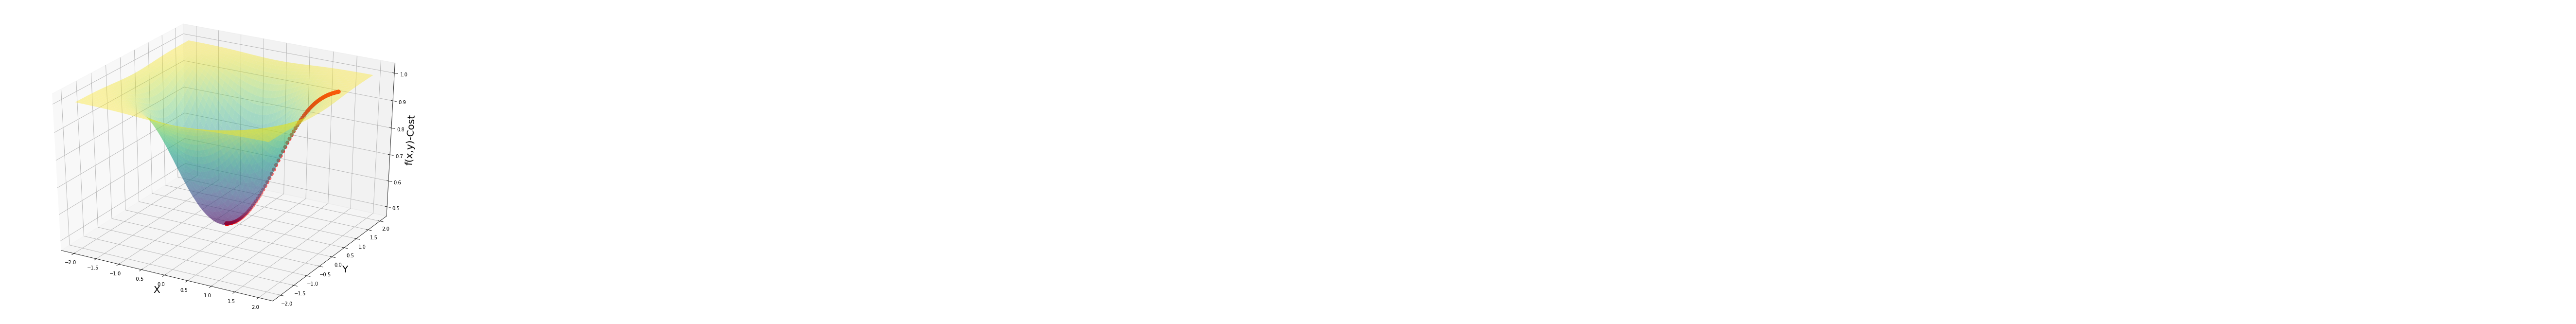

In [45]:
# Generating 3d plot

fig = plt.figure(figsize=(16,12))

ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-Cost',fontsize=20)

ax.scatter(values_array[:,0],values_array[:,1],
           f(values_array[:,0],values_array[:,1]),s=50,color='red')

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.viridis,alpha=0.4)

# working with data & real cost function

In [46]:
# sample data 

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)


Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [49]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


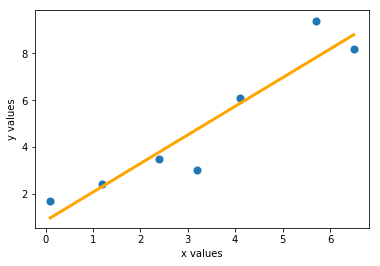

In [50]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [51]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [76]:
# function and print out the MSE for the y_hat calculated above. 

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [77]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [108.51285714]
MSE regression using manual calc is 108.51285714285714
MSE regression is 0.9479655759794577


# 3D Plot for the MSE Cost Functions

## Make data for theras

In [99]:
nr_thetas = 5
th_0 = np.linspace(-1,3,num=nr_thetas)
th_1 = np.linspace(-1,3,num=nr_thetas)

plot_t0 ,plot_t1 = np.meshgrid(th_0,th_1)

### Calc MSE using nested for loops

In [100]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

In [101]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        
        # mean sqar error 
        
        plot_cost[i][j] = mse(y_5,y_hat)
        
print('Shape of plot_t0',plot_t0.shape) 
print('Shape of plot_t1',plot_t1.shape)
print('Shape of plot_cost',plot_cost.shape)

Shape of plot_t0 (5, 5)
Shape of plot_t1 (5, 5)
Shape of plot_cost (5, 5)


In [107]:
plot_test = np.ones((5,5))
plot_test.shape

(5, 5)

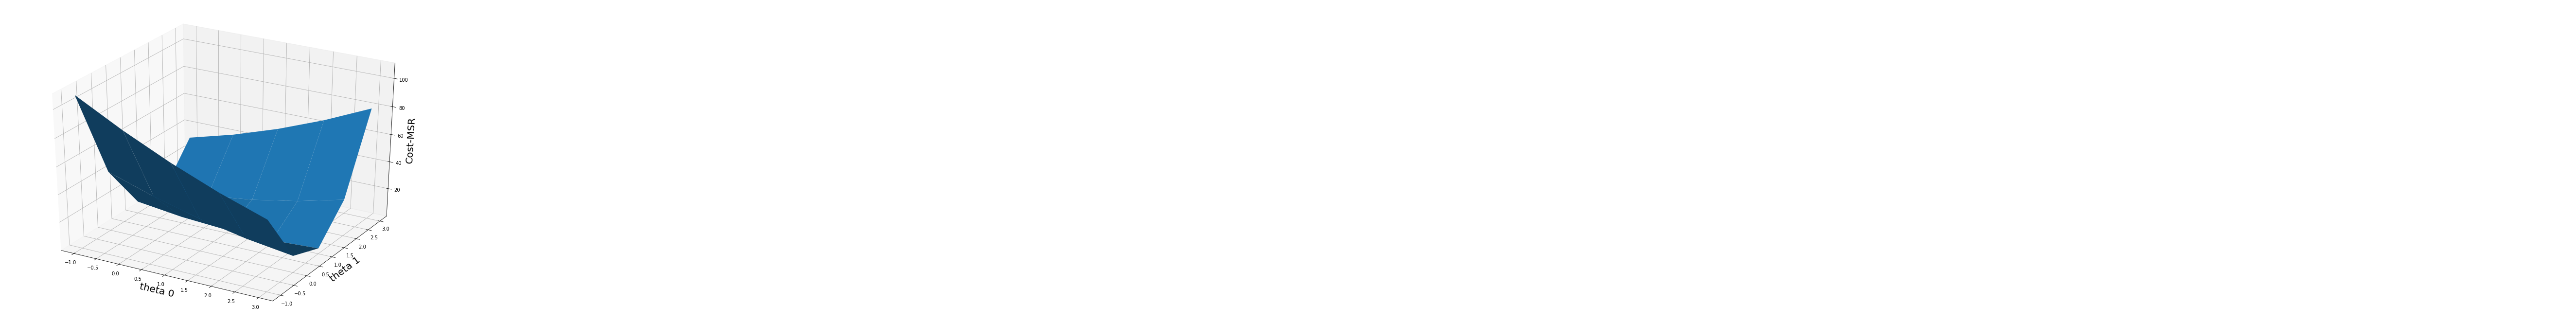

In [110]:
# Ploting MSE

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')

ax.set_xlabel('theta 0',fontsize=20)
ax.set_ylabel('theta 1',fontsize=20)
ax.set_zlabel('Cost-MSR',fontsize=20)



ax.plot_surface(plot_t0,plot_t1,plot_cost)
plt.show()

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


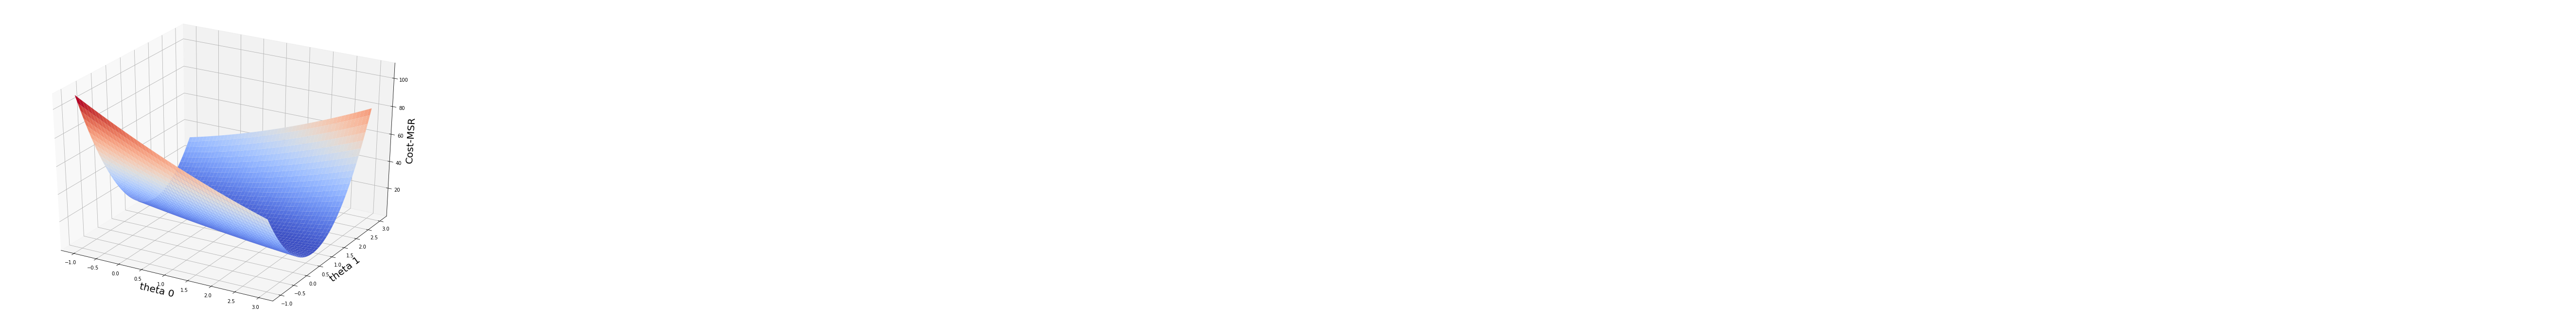

In [85]:
nr_thetas = 200
th_0 = np.linspace(-1,3,num=nr_thetas)
th_1 = np.linspace(-1,3,num=nr_thetas)

plot_t0 ,plot_t1 = np.meshgrid(th_0,th_1)

plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        
        # mean sqar error 
        
        plot_cost[i][j] = mse(y_5,y_hat)
        
print('Shape of plot_t0',plot_t0.shape) 
print('Shape of plot_t1',plot_t1.shape)
print('Shape of plot_cost',plot_cost.shape)


# Ploting MSE

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')

ax.set_xlabel('theta 0',fontsize=20)
ax.set_ylabel('theta 1',fontsize=20)
ax.set_zlabel('Cost-MSR',fontsize=20)

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.coolwarm)
plt.show()

In [93]:
print('Min val of plot_cost',plot_cost.min())

ij_min = np.unravel_index(indices=plot_cost.argmin(),
                         dims= plot_cost.shape)

print('Min cost occurence (i,j)',ij_min)
print('Min cost for theta 0 is:',plot_t0[111][91])
print('Min cost for theta 1 is:',plot_t1[111][91])


Min val of plot_cost 0.9483826526747164
Min cost occurence (i,j) (111, 91)
Min cost for theta 0 is: 0.829145728643216
Min cost for theta 1 is: 1.2311557788944723


## Partial Derivatives of MSE w.r.t $ \theta_0$ and $ \theta_1$


## $$ \frac {\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)}-\theta_0-\theta_1 x^{(i)} \big) $$

## $$ \frac {\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)}-\theta_0-\theta_1 x^{(i)}\big) 
\big(x ^{(i)}\big) $$

## MSE & Gradiean Descent

## x values, y values, array of theta[0o,01 ]

In [123]:
 def grad(x,y,thetas):
        
        n = y.size
        
        slop_0 = -2/n * sum(y-thetas[0]-thetas[1]*x)
        
        slop_1 = -2/n * sum((y-thetas[0]-thetas[1]*x)*x)
        
        #return np.array([slop_0,slop_1]) 
        return np.concatenate((slop_0,slop_1),axis=0)
        

In [125]:
# finding minmun values

thetas = np.array([2.9,2.9])

grad(x_5,y_5,thetas).shape


(2,)

In [154]:
lr = 0.01
thetas = np.array([2.9,2.9])
#collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5,thetas[0]+thetas[1]*x_5)
for i in range(1000):
    
    thetas = thetas - lr * grad(x_5,y_5,thetas)
    
    plot_vals = np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
    mse_vals  = np.append(arr=mse_vals,values=mse(y_5,thetas[0]+thetas[1]*x_5))
    
#Results 
print('Min occurencs at theta 0:', thetas[0])
print('Min occurencs at theta 1:', thetas[1])
print('MSE is:',mse(y_5,thetas[0]+thetas[1]*x_5))

Min occurencs at theta 0: 0.8532230461743415
Min occurencs at theta 1: 1.2214935332607393
MSE is: [0.94797511]


In [155]:
mse_vals.shape

(1001,)

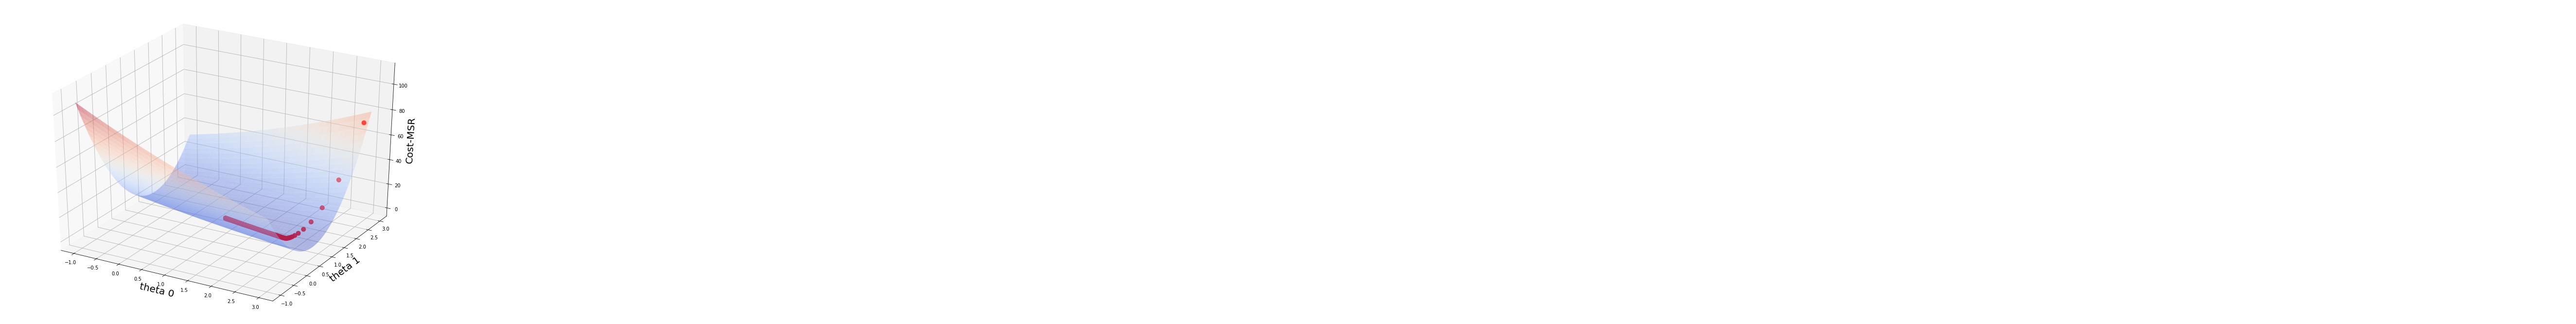

In [157]:

# Ploting MSE

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')

ax.set_xlabel('theta 0',fontsize=20)
ax.set_ylabel('theta 1',fontsize=20)
ax.set_zlabel('Cost-MSR',fontsize=20)

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.coolwarm,alpha=0.4)
ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=80,color = 'red')
plt.show()